In [38]:
import sys
import numpy as np
import cv2
from PIL import Image 

In [39]:
obj = cv2.imread('/Users/jungjihoon/Library/Mobile Documents/com~apple~CloudDocs/00_DataScience/민형기/spades.png', cv2.IMREAD_GRAYSCALE)
src = cv2.imread('/Users/jungjihoon/Library/Mobile Documents/com~apple~CloudDocs/00_DataScience/민형기/symbols.png', cv2.IMREAD_GRAYSCALE)

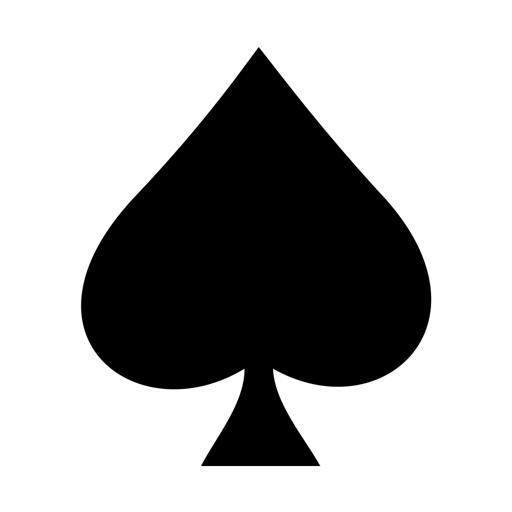

In [40]:
Image.fromarray(obj)

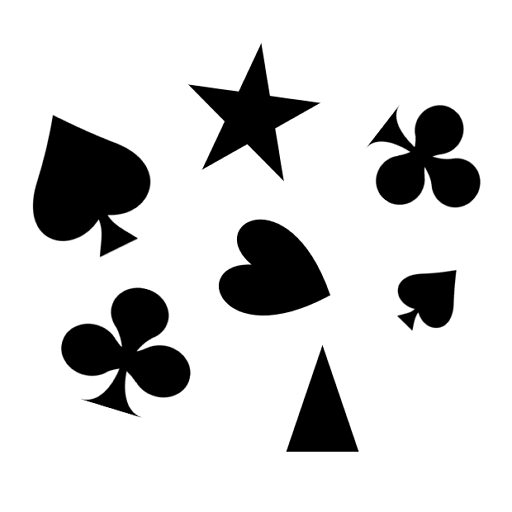

In [41]:
Image.fromarray(src)

In [42]:
#객체 영상 외곽선 검출
_, obj_bin = cv2.threshold(obj, 128, 255, cv2.THRESH_BINARY_INV)
obj_contours, _ = cv2.findContours(obj_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
obj_pts = obj_contours[0]

In [43]:
obj_pts.shape

(1210, 1, 2)

In [44]:
# 입력 영상 분석
_, src_bin = cv2.threshold(src, 128, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(src_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [45]:
contours[0].shape

(280, 1, 2)

In [46]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

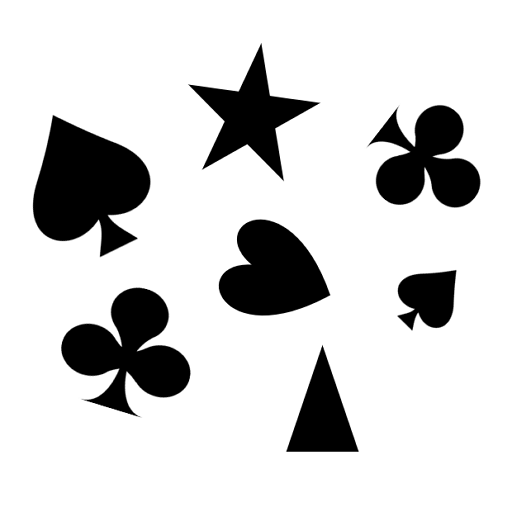

In [47]:
Image.fromarray(dst)

In [48]:
for pts in contours:
    if cv2.contourArea(pts) < 1000:
        continue
    rc = cv2.boundingRect(pts)
    cv2.rectangle(dst, rc, (255, 0, 0), 1)
    
    # 모양 비교
    dist = cv2.matchShapes(obj_pts, pts, cv2.CONTOURS_MATCH_I3, 0)
    
    cv2.putText(dst, str(round(dist, 4)), (rc[0], rc[1] - 3),
          cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 1, cv2.LINE_AA)
    
    if dist < 0.1:
        cv2.rectangle(dst, rc, (0, 0, 255), 2)

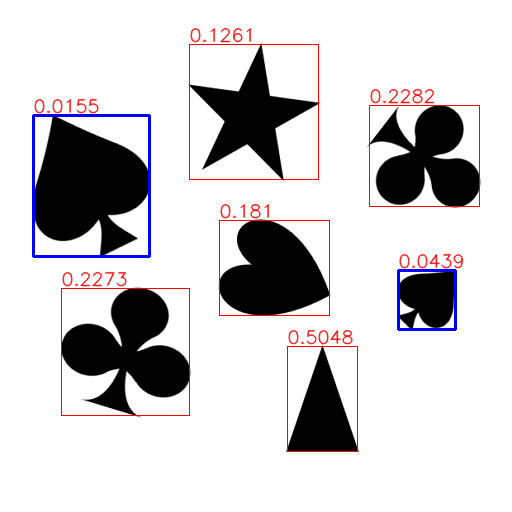

In [49]:
Image.fromarray(dst)